<a href="https://colab.research.google.com/github/E-wave112/ml_proj1/blob/master/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##implementing an nlp model with rnn and lstm
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
import string
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

train_df = pd.read_csv('/content/drive/MyDrive/tnlp/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/tnlp/test.csv')
submission_file = pd.read_csv('/content/drive/MyDrive/tnlp/sample_submission.csv')

def remove_nick(text):
    return re.sub(r"\@\S+", "",text)

train_df['text'] = train_df['text'].apply(lambda x:remove_nick(x))
test_df['text'] = test_df['text'].apply(lambda x:remove_nick(x))

def remove_nums(num):
    return ''.join(i for i in num if not i.isdigit())

train_df['text'] = train_df['text'].apply(lambda x:remove_nums(x))
test_df['text'] = test_df['text'].apply(lambda x:remove_nums(x))

def remove_url(y):
    url = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(r'',"", y)

train_df['text'] = train_df['text'].apply(lambda x:remove_url(x))
test_df['text'] = test_df['text'].apply(lambda x:remove_url(x))

def remove_punctuations(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

train_df['text'] = train_df['text'].apply(lambda x:remove_punctuations(x))
test_df['text'] = test_df['text'].apply(lambda x:remove_punctuations(x))


def remove_stopwords(text):

    words = [w for w in text if w not in stopwords.words('english')]
    return words[i for i in range(len(words))]

train_df['text'] = train_df['text'].apply(lambda x:remove_stopwords(x))
test_df['text'] = test_df['text'].apply(lambda x:remove_stopwords(x))

train_df = train_df.applymap(lambda s:s.lower() if type(s) == str else s)
test_df = test_df.applymap(lambda s:s.lower() if type(s) == str else s)

vectorizer = TfidfVectorizer()

train_vectors = vectorizer.fit_transform(train_df['text']).toarray()
test_vectors = vectorizer.transform(test_df['text']).toarray()

#modelling

gnb_clf = GaussianNB()
gnb_clf.fit(train_vectors,train_df['target'])

pred = gnb_clf.predict(test_vectors)

submission_file['target'] = pred
submission_file.to_csv('/content/drive/MyDrive/tnlp/subnb',index=False)



In [ ]:
##using rnn in our sentiment analysis problem
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
import string
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D


train_df = pd.read_csv('/content/drive/MyDrive/tnlp/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/tnlp/test.csv')
submission_file = pd.read_csv('/content/drive/MyDrive/tnlp/sample_submission.csv')

train_df.drop(train_df[['id','location','keyword']],axis=1,inplace=True)
test_df.drop(test_df[['id','location','keyword']],axis=1,inplace=True)

train_df['text'] = train_df['text']
test_df['text'] = test_df['text']
# train_df['text'].replace(i,[i.astype('str') for i in train_df['text']])
# test_df['text'].replace(i,[i.astype('str') for i in test_df['text']])
# print(train_df.head())
# print(test_df.head())
# def remove_nick(text):
#     return re.sub(r"\@\S+", "",text)

# train_df = train_df.apply(lambda x:remove_nick(x))
# test_df = test_df.apply(lambda x:remove_nick(x))


replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}

# def clean_text(text):
#     text = text.lower()
#     for s in replace_list:
#         text = text.replace(s, replace_list[s])
#     text = ' '.join(text.split())
#     return text


# train_df['text'] = train_df['text'].apply(lambda x:clean_text(x))
# test_df['text'] = test_df['text'].apply(lambda x:clean_text(x))

# phrase_len = train_df['text'].apply(lambda p:len(p.split(' ')))
# max_phrase_len = phrase_len.max()

def remove_nums(num):
    return ''.join(i for i in num if not i.isdigit())

train_df['text'] = train_df['text'].apply(lambda x:remove_nums(x))
test_df['text'] = test_df['text'].apply(lambda x:remove_nums(x))

# print(train_df.head())

def remove_url(y):
    url = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(r'https?://\S+|www\.\S+'," ",y)
    
train_df['text']=train_df['text'].apply(lambda x:remove_url(x))
test_df['text']=test_df['text'].apply(lambda x:remove_url(x))

def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    

train_df['text'] = train_df['text'].apply(lambda x:remove_stopwords(x))
test_df['text'] = test_df['text'].apply(lambda x:remove_stopwords(x))


def remove_punctuations(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

# train_df['text'] = train_df['text'].apply(lambda x:remove_punctuations(x))
# test_df['text'] = test_df['text'].apply(lambda x:remove_punctuations(x))




max_words = 8192
tokenizer = Tokenizer(
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~',
    lower=True
)
# print(max_phrase_len)
tokenizer.fit_on_texts(train_df['text'])
tokenizer.fit_on_texts(test_df['text'])

train_df['text'] = tokenizer.texts_to_sequences(train_df['text'])
test_df['text'] = tokenizer.texts_to_sequences(test_df['text'])

train_df['text']  = pad_sequences(train_df['text'])
test_df['text'] = pad_sequences(test_df['text'])


train_df['author'] =to_categorical(train_df['author'])

# train_df['target'] = np.array(train_df['target'])


# train_df['text'] = np.array(train_df['text'])

#print(train_df['target'][:15])


batch_size = 512
epochs = 8

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 256))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(256, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(2, activation = 'softmax'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['f1']
)

history = model_lstm.fit(
    train_df['text'],
    train_df['target'],
    validation_split = 0.1,
    epochs = epochs,
    batch_size = batch_size
)


pred = model_lstm.predict(test_df)
print(pred[:5])

AttributeError: ignored

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 100)          2299700   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 150, 100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 300)               481200    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 602       
Total params: 2,781,502
Trainable params: 2,781,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
33/33 [==============================] - 113s 3s/step - loss: 0.6815 - auc: 0.5910 - val_loss: 0.6699 - val_auc: 0.6675
Epoch 2/30
33/33 [==============================] - 110s 3s/step - loss: 0.6124 - auc: 0.7421 - val_loss: 0.533

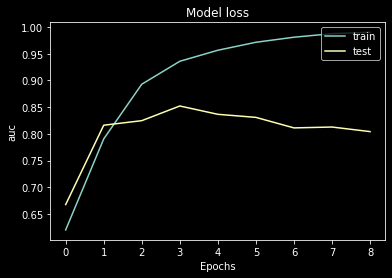

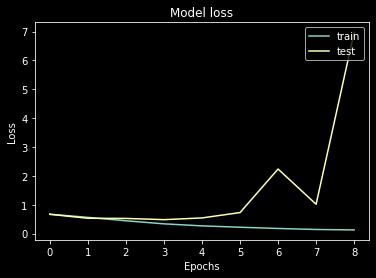

[1 1 1 1 1]


In [ ]:
##using rnn in our sentiment analysis problem
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
# from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
import string
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D


train_df = pd.read_csv('/content/drive/MyDrive/tnlp/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/tnlp/test.csv')
submission_file = pd.read_csv('/content/drive/MyDrive/tnlp/sample_submission.csv')

train_df.drop(train_df[['id','location','keyword']],axis=1,inplace=True)
test_df.drop(test_df[['id','location','keyword']],axis=1,inplace=True)

# print(train_df.head())
# train_df['text'].replace(i,[i.astype('str') for i in train_df['text']])
# test_df['text'].replace(i,[i.astype('str') for i in test_df['text']])
# print(train_df.head())
# print(test_df.head())
def remove_nick(text):
    return re.sub(r"\@\S+", "",text)

train_df['text'] = train_df['text'].apply(remove_nick)
test_df['text'] = test_df['text'].apply(remove_nick)


replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}

# def clean_text(text):
#     text = text.lower()
#     for s in replace_list:
#         text = text.replace(s, replace_list[s])
#     text = ' '.join(text.split())
#     return text


# train_df['text'] = train_df['text'].apply(lambda x:clean_text(x))
# test_df['text'] = test_df['text'].apply(lambda x:clean_text(x))

# phrase_len = train_df['text'].apply(lambda p:len(p.split(' ')))
# max_phrase_len = phrase_len.max()

def remove_nums(num):
    return ''.join(i for i in num if not i.isdigit())

train_df['text'] = train_df['text'].apply(remove_nums)
test_df['text'] = test_df['text'].apply(remove_nums)
# # print(train_df.head())

def remove_url(y):
    url = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(r'https?://\S+|www\.\S+'," ",y)
    
train_df['text']=train_df['text'].apply(remove_url)
test_df['text']=test_df['text'].apply(remove_url)

# def remove_stopwords(text):
#     words = [w for w in text if w not in stopwords.words('english')]
#     return words

# train_df['text'] = train_df['text'].apply(remove_stopwords)
# test_df['text'] = test_df['text'].apply(remove_stopwords)


# def remove_punctuations(text):
#     table = str.maketrans('','',string.punctuation)
#     return text.translate(table)

# train_df['text'] = train_df['text'].apply(lambda x:remove_punctuations(x))
# test_df['text'] = test_df['text'].apply(lambda x:remove_punctuations(x))




max_words = 10000
MAX_SEQUENCE_LENGTH = 150
tokenizer = Tokenizer(
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~',
)
# print(max_phrase_len)
tokenizer.fit_on_texts(train_df['text'])
tokenizer.fit_on_texts(test_df['text'])

vocab_size = len(tokenizer.word_index) + 1
##change the texts to variable arrays
X_train = tokenizer.texts_to_sequences(train_df['text'])

X_test = tokenizer.texts_to_sequences(test_df['text'])
##make each array of equal length
X_train = pad_sequences(X_train,maxlen=MAX_SEQUENCE_LENGTH)
X_test= pad_sequences(X_test,maxlen=MAX_SEQUENCE_LENGTH)
# print(test_df['text'][20:35])

# train_df['text'] = np.array(train_df['text'])
# test_df['text'] = np.array(test_df['text'])
Y=np.array(train_df['target'])
Y =to_categorical(Y)

batch_size = 256
epochs = 30

model_lstm = Sequential()
# tf.keras.layers.Flatten()
model_lstm.add(Embedding(vocab_size,100,input_length=150))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(300, dropout = 0.3, recurrent_dropout = 0.3,activation='relu'))
model_lstm.add(Dense(2, activation='sigmoid'))
model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['AUC']
)

model_lstm.summary()
history = model_lstm.fit(
    X_train,
    Y,
    validation_split = 0.15,
    epochs = epochs,
    batch_size = 200, callbacks=EarlyStopping(monitor="val_loss",
                                              min_delta=0.001,
                                              patience=5)
)
##learning curve for model accuracy
plt.title('Model loss')
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend(['train','test'],loc ='upper right')
plt.show()


##learning curve for model loss
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc ='upper right')
plt.show()

pred = np.argmax(model_lstm.predict(X_test),axis=-1)
submission_file['target'] = pred
submission_file.to_csv('/content/drive/MyDrive/tnlp/sub3.csv',index=False)
print(pred[:5])

In [16]:
import numpy as np
a = np.array([[1,2,3,4],[5,6,7,8]])
print(np.all(a > 1,axis=0))

[False  True  True  True]


In [3]:
##using the bert model
##import data and modules
import re
import numpy as np
import pandas as pd
import transformers as ppb
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
train = pd.read_csv('/content/drive/MyDrive/tnlp/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/tnlp/test.csv')
submission_file = pd.read_csv('/content/drive/MyDrive/tnlp/sample_submission.csv')

train.drop(train[['id','location','keyword']],axis=1,inplace=True)
test_df.drop(test_df[['id','location','keyword']],axis=1,inplace=True)
train_df = train.iloc[:1000]
print(train_df.shape,test_df.shape)

#remove nicknames
def remove_nick(text):
  text = text.lower()
  return re.sub(r"\@\S+", "",text)

train_df['text'] = train_df['text'].apply(remove_nick)
test_df['text'] = test_df['text'].apply(remove_nick)

##remove numbers 
def remove_nums(num):
  return ''.join(i for i in num if not i.isdigit())

train_df['text'] = train_df['text'].apply(remove_nums)
test_df['text'] = test_df['text'].apply(remove_nums)

##remove urls
def remove_url(y):
  url = re.compile(r'https?://\S+|www\.\S+')
  return re.sub(r'https?://\S+|www\.\S+'," ",y)
    
train_df['text']=train_df['text'].apply(remove_url)
test_df['text']=test_df['text'].apply(remove_url)


##model with  pretrained bert
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)
##tokenize our text
tokenized_texts = train_df['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
tokenized_texts2 = test_df['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
##padded our lists of texts
max_len = 0
for i in tokenized_texts.values:
    if len(i) > max_len:
        max_len = len(i)

padded_words = np.array([i + [0]*(max_len-len(i)) for i in tokenized_texts.values])
padded_words2 = np.array([i + [0]*(max_len-len(i)) for i in tokenized_texts2.values])
##use an attention mask in order to tell the bert model that we should ignore the padding sequence
attention_mask = np.where(padded_words != 0, 1, 0)
attention_mask2 = np.where(padded_words != 0, 1, 0)

##train our dl model
input_ids = torch.tensor(padded_words)  
attention_mask = torch.tensor(attention_mask)
##test
input_ids2 = torch.tensor(padded_words2)  
attention_masks2 = torch.tensor(attention_mask2)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

with torch.no_grad():
    last_hidden_states2 = model(input_ids2, attention_masks2=attention_masks2)

features = last_hidden_states[0][:,0,:].numpy()
features_2 = last_hidden_states2[0][:,0,:].numpy()


labels = train_df['target']

log_clf = LogisticRegression()
log_clf.fit(features,labels)

prediction = log_clf.predict(features_2)
print(prediction[:5])

(1000, 2) (3263, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

TypeError: ignored

In [2]:
!pip install transformers

     |████████████████████████████████| 1.8MB 21.0MB/s 
     |████████████████████████████████| 890kB 53.1MB/s 
     |████████████████████████████████| 3.2MB 55.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=20236f12732d705ac874487917f99443570833ffd4436cf0252eaf1042ab9b0f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
i = []
while(True):

    i.append('a')

In [40]:
import numpy as np
a = np.array([[1,2,3,4], [5,6,7,8]])
print(a[1,1])

6
